In [1]:
#!pip install scikit-plot

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from tqdm import tqdm
from gensim.models.doc2vec import TaggedDocument
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,precision_score
from sklearn.naive_bayes import MultinomialNB
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
tweets_df =  pd.read_csv("tweets_preproc.csv")
tweets_df = tweets_df.drop('Unnamed: 0', axis=1)
tweets_df

,text,author,source,timestamp,id,Puntuaciones,Puntuacion,Polaridad,Texto Preprocesado,Raiz Palabras
0,estrenos mensuales en netflix disney y prime ...,159917675,Twitter for iPhone,2022-01-01 01:22:09,1477087717167087621,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,Neutral,estrenos mensuales netflix disney prime video ...,estren mensual netflix disney prim vide blog
1,albert alfred y la magia echa serie music...,385918940,Twitter for Android,2022-01-01 02:27:16,1477104103926996994,"{'neg': 0.0, 'neu': 0.945, 'pos': 0.055, 'comp...",0.421,Positivo,albert alfredo magia echa serie musica literat...,albert alfred magi echa seri music literatur n...
2,tratar a todos los equipos de futbol en las r...,238286158,Talon Android,2022-01-01 08:20:30,1477192997016113153,"{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'comp...",0.402,Positivo,tratar equipos futbol retransmisiones igual,trat equip futbol retransmision igual
3,bajada de precio de la fibra mejorar la calid...,82388144,Twitter for Android,2022-01-01 08:51:51,1477200887663804421,"{'neg': 0.081, 'neu': 0.704, 'pos': 0.215, 'co...",0.557,Positivo,bajada precio fibra mejorar calidad sonido ima...,baj preci fibr mejor calid son imag canal mejo...
4,postes de cortando la dp a la altura del km e...,196401713,Twitter for iPhone,2022-01-01 09:22:55,1477208706182000640,"{'neg': 0.097, 'neu': 0.903, 'pos': 0.0, 'comp...",-0.128,Negativo,postes cortando altura km ares corona,post cort altur km ares coron
...,...,...,...,...,...,...,...,...,...,...
159851,los clientes ya sabemos eso los que no se sab...,1227852829257326592,Twitter Web App,2022-06-30 20:26:43,1542605573895725056,"{'neg': 0.056, 'neu': 0.792, 'pos': 0.151, 'co...",0.476,Positivo,clientes sabemos saben cumplen contrato deberi...,client sab sab cumpl contrat deberi leer contr...
159852,lo que me gustaria saber es por que llevo una...,1168354052,Twitter for Android,2022-06-30 21:07:14,1542615768289902592,"{'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'comp...",0.827,Positivo,gustaria saber llevo semana contratando servic...,gustari sab llev seman contrat servici ofert g...
159853,deberias cambiar esa bandera absurda o ahora ...,1397178749985202176,Twitter for Android,2022-06-30 21:55:32,1542627925358481409,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,Neutral,deberias cambiar bandera absurda ahora lobo,deberi cambi bander absurd ahor lob
159854,ya me falta poco y cambio de empresa suerte,452596569,Twitter for Android,2022-06-30 22:17:56,1542633561169305602,"{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'comp...",0.509,Positivo,falta cambio empresa suerte,falt cambi empres suert


In [4]:
tweets_positivo_df = tweets_df[tweets_df['Polaridad'] == "Positivo"]
tweets_positivo_df = tweets_positivo_df.dropna()
tweets_positivo_df = tweets_positivo_df.sample(n = 20000)

tweets_negativo_df = tweets_df[tweets_df['Polaridad'] == "Negativo"]
tweets_negativo_df = tweets_negativo_df.dropna()
tweets_negativo_df = tweets_negativo_df.sample(n = 20000)

tweets_df = pd.concat([tweets_positivo_df,tweets_negativo_df])
tweets_df

,text,author,source,timestamp,id,Puntuaciones,Puntuacion,Polaridad,Texto Preprocesado,Raiz Palabras
102556,el procesador es una autentica pasada mas p...,1060866134,Twitter for Android,2022-02-10 10:23:16,1491719406996660224,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...",0.801,Positivo,procesador autentica pasada mas potente misil ...,proces autent pas mas potent misil core nort
131761,llamar a mi madre para que vea que he ganado...,1035245724940886016,Twitter for Android,2022-03-04 10:35:11,1499694940066095108,"{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'comp...",0.611,Positivo,llamar madre vea ganado vida,llam madr vea gan vid
54744,enviado espero una pronta solucion pues ya ha...,1257459494747070468,Twitter Web App,2022-01-17 13:52:16,1483074698506387461,"{'neg': 0.106, 'neu': 0.588, 'pos': 0.306, 'co...",0.527,Positivo,enviado espero pronta solucion pues cobrado ca...,envi esper pront solucion pues cobr canall
111207,hola se soluciono tras min intentando contact...,1154133146667012096,Twitter for iPhone,2022-04-14 12:34:50,1514582955049504778,"{'neg': 0.0, 'neu': 0.925, 'pos': 0.075, 'comp...",0.494,Positivo,hola soluciona tras intentando contactar vida ...,hol solucion tras intent contact vid whatsapp ...
83246,a mi tambien me pasa en pero es que van ...,1020284584620187648,Twitter for iPhone,2022-05-03 10:23:37,1521435303503929344,"{'neg': 0.0, 'neu': 0.933, 'pos': 0.067, 'comp...",0.438,Positivo,tambien pasa van temporadas decir arco primer ...,tambi pas van tempor dec arco prim torne ir em...
...,...,...,...,...,...,...,...,...,...,...
153140,lo peor es que lo sabia me estaba vacilando ...,157954555,Twitter for iPhone,2022-04-09 13:00:44,1512777532340322306,"{'neg': 0.471, 'neu': 0.529, 'pos': 0.0, 'comp...",-0.836,Negativo,peor sabia vacilando locos,peor sabi vacil loc
141179,masmovil estoy cansado de decirle a vuestros c...,137299903,Twitter for iPhone,2022-01-12 15:54:30,1481293519272751107,"{'neg': 0.101, 'neu': 0.872, 'pos': 0.026, 'co...",-0.572,Negativo,masmovil cansado decirle comerciales quiero sa...,masmovil cans dec comercial quier sab numer fi...
43287,terrible partido no vamos a ningun lado...,191793120,Twitter for Android,2022-05-27 20:12:12,1530280731590725632,"{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...",-0.638,Negativo,terrible partido vamos ninguna lado si,terribl part vam ningun lad si
114260,buscate un operador decente y legal es de...,959113286,Twitter for Android,2022-05-05 06:07:35,1522095644260900864,"{'neg': 0.038, 'neu': 0.939, 'pos': 0.023, 'co...",-0.248,Negativo,buscase operador decente legal grupo devuelve ...,busc oper decent legal grup devuelv ultim reci...


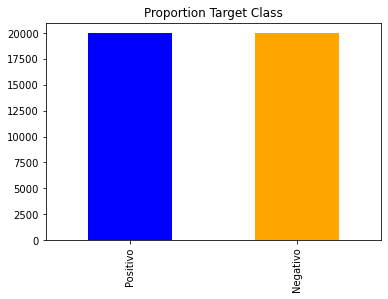

In [5]:
count_class=pd.value_counts(tweets_df["Polaridad"], sort= True)
count_class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Proportion Target Class')
plt.show()

In [6]:
tweets_df['Texto Preprocesado'] = tweets_df['Texto Preprocesado'].astype(str)

In [7]:
main_text = tweets_df['Texto Preprocesado']
target = tweets_df['Polaridad']

print(len(main_text))
print(len(target))

40000
40000


In [8]:
cv=CountVectorizer()


train_data,test_data = train_test_split(tweets_df,train_size=0.8,random_state=0)

X_train = cv.fit_transform(train_data['Texto Preprocesado'])
y_train = train_data['Polaridad']
X_test = cv.transform(test_data['Texto Preprocesado'])
y_test = test_data['Polaridad']

In [9]:
nb = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
nb.fit(X_train,y_train)

MultinomialNB()

In [10]:
nb_predict=nb.predict(X_test)

In [11]:
nb_report = accuracy_score(y_test,nb_predict)
print('Accuracy:',nb_report)

Accuracy: 0.780125


In [12]:
nb_report1 = recall_score(y_test,nb_predict,pos_label='Positivo',average='binary')
print('Recall:',nb_report1)

Recall: 0.695054945054945


In [13]:
nb_report2 = precision_score(y_test,nb_predict,pos_label='Positivo',average='binary')
print('Precision:',nb_report2)

Precision: 0.8380006022282445


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

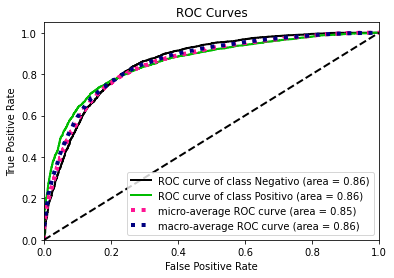

In [14]:
skplt.metrics.plot_roc(y_test, nb.predict_proba(X_test))